# A Walk Through Linear Models
*Complete and hand in this completed worksheet (including its outputs and any supporting code outside of the worksheet) with your assignment submission. Please check the pdf file for more details.*

In this exercise you will:
    
- implement a whole bunch of **linear classifiers**
- compare their performance and properties

Please note that **YOU CANNOT USE ANY MACHINE LEARNING PACKAGE SUCH AS SKLEARN** for any homework, unless you are asked. 

In [7]:
# some basic imports
import numpy as np
import scipy
import matplotlib.pyplot as plt
from mkdata import mkdata
from plotdata import plotdata

%matplotlib inline

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


You can use this skeleton or write your own.

NOTE: Be becareful that the bias term is in the first element of weight, that is `y = np.sign(np.matmul(w_g.T, np.vstack((np.ones((1, X.shape[1])), X)))).T`

### Part1: Preceptron

E_train is 0.0, E_test is 0.11132
Average number of iterations is 5.691.


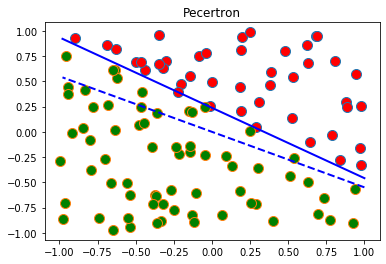

In [8]:
from perceptron import perceptron

nRep = 1000 # number of replicates
nTrain = 10 # number of training data
nTest = 100
avgIter = 0
E_train = 0
E_test = 0

for i in range(nRep):
    X, y, w_f = mkdata(nTrain + nTest)
    (X_train, y_train) = (X[:, 0:nTrain], y[:, 0:nTrain])
    (X_test, y_test) = (X[:, nTrain:nTrain+nTest], y[:, nTrain:nTrain+nTest])
    w_g, iters = perceptron(X_train, y_train)
    # Compute training, testing error
    add_bias_xtrain = np.insert(X_train, 0, values=np.ones((1, nTrain)), axis=0)
    add_bias_xtest = np.insert(X_test, 0, values=np.ones((1, nTest)), axis=0)
    num_error_train = np.sum(np.int64(np.dot(w_g.T, add_bias_xtrain) * y_train < 0))
    E_train += num_error_train
    num_error_test = np.sum(np.int64(np.dot(w_g.T, add_bias_xtest) * y_test < 0))
    E_test += num_error_test
    # Sum up number of iterations
    avgIter += iters
    
avgIter = avgIter / nRep
E_train = E_train / (nTrain * nRep)
E_test = E_test / (nTest * nRep)
print('E_train is {}, E_test is {}'.format(E_train, E_test))
print('Average number of iterations is {}.'.format(avgIter))
plotdata(X, y, w_f, w_g, 'Pecertron')

### Part2: Preceptron: Non-linearly separable case

In [9]:
nTrain = 10 # number of training data
X, y, w_f = mkdata(nTrain, 'noisy')
w_g, iters = perceptron(X, y)
# print('E_train is {}, E_test is {}'.format(E_train, E_test))
# print('Average number of iterations is {}.'.format(avgIter))
plotdata(X, y, w_f, w_g, 'Pecertron Non-linearly separable')


KeyboardInterrupt: 

### Part3: Linear Regression

E_train is 0.03766, E_test is 0.04735


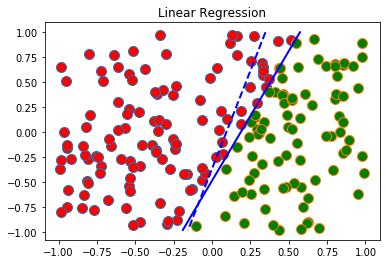

In [28]:
from linear_regression import linear_regression

nRep = 1000  # number of replicates
nTrain = 100 # number of training data
nTest = 100
E_train = 0
E_test = 0
for i in range(nRep):
    X, y, w_f = mkdata(nTrain + nTest)
    (X_train, y_train) = (X[:, 0:nTrain], y[:, 0:nTrain])
    (X_test, y_test) = (X[:, nTrain:nTrain+nTest], y[:, nTrain:nTrain+nTest])
    w_g = linear_regression(X_train, y_train)
    # Compute training, testing error
    add_bias_xtrain = np.insert(X_train, 0, values=np.ones((1, nTrain)), axis=0)
    add_bias_xtest = np.insert(X_test, 0, values=np.ones((1, nTest)), axis=0)
    num_error_train = np.sum(np.int64(np.dot(w_g.T, add_bias_xtrain) * y_train < 0))
    E_train += num_error_train
    num_error_test = np.sum(np.int64(np.dot(w_g.T, add_bias_xtest) * y_test < 0))
    E_test += num_error_test
    
E_train = E_train / (nTrain * nRep)
E_test = E_test / (nTest * nRep)
print('E_train is {}, E_test is {}'.format(E_train, E_test))

plotdata(X, y, w_f, w_g, 'Linear Regression');


## Part4: Linear Regression: noisy

E_train is 0.1309, E_test is 0.05809


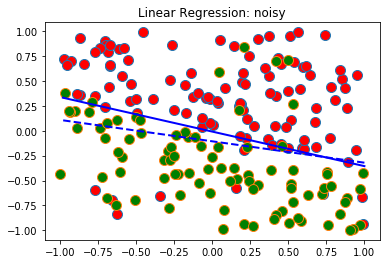

In [31]:

nRep = 1000; # number of replicates
nTrain = 100; # number of training data
nTest = 100
E_train = 0
E_test = 0
for i in range(nRep):
    X, y, w_f = mkdata(nTrain + nTest, 'noisy')
    (X_train, y_train) = (X[:, 0:nTrain], y[:, 0:nTrain])
    X_test = X[:, nTrain:nTrain+nTest]
    add_bias_xtrain = np.insert(X_train, 0, values=np.ones((1, nTrain)), axis=0)
    add_bias_xtest = np.insert(X_test, 0, values=np.ones((1, nTest)), axis=0)
    y_test = np.dot(w_f.T, add_bias_xtest)
    w_g = linear_regression(X_train, y_train);
    # Compute training, testing error
    num_error_train = np.sum(np.int64(np.dot(w_g.T, add_bias_xtrain) * y_train < 0))
    E_train += num_error_train
    num_error_test = np.sum(np.int64(np.dot(w_g.T, add_bias_xtest) * y_test < 0))
    E_test += num_error_test
    
E_train = E_train / (nTrain * nRep)
E_test = E_test / (nTest * nRep)
print('E_train is {}, E_test is {}'.format(E_train, E_test))

plotdata(X, y, w_f, w_g, 'Linear Regression: noisy');

## Part5: Linear Regression: poly_fit

In [48]:
import scipy.io as sio
poly_train = sio.loadmat('poly_train')
X, y = poly_train['X'], poly_train['y']
poly_test = sio.loadmat('poly_test')
X_test, y_test = poly_test['X_test'], poly_test['y_test']
w = linear_regression(X, y)
# Compute training, testing error
add_bias_xtrain = np.insert(X, 0, values=np.ones((1, X.shape[1])), axis=0)
add_bias_xtest = np.insert(X_test, 0, values=np.ones((1, X_test.shape[1])), axis=0)
E_train = 0
E_test = 0
num_error_train = np.sum(np.int64(np.dot(w.T, add_bias_xtrain) * y < 0))
E_train += num_error_train
num_error_test = np.sum(np.int64(np.dot(w.T, add_bias_xtest) * y_test < 0))
E_test += num_error_test

E_train = E_train / X.shape[1]
E_test = E_test / X_test.shape[1]
print('E_train is {}, E_test is {}'.format(E_train, E_test))

# poly_fit with transform
X_t = np.row_stack((X, X[0, :] * X[1, :]))# CHANGE THIS LINE TO DO TRANSFORMATION
X_t = np.row_stack((X_t, np.power(X[0, :], 2)))
X_t = np.row_stack((X_t, np.power(X[1, :], 2)))

X_test_t = np.row_stack((X_test, X_test[0, :] * X_test[1, :]))  # CHANGE THIS LINE TO DO TRANSFORMATION
X_test_t = np.row_stack((X_test_t, np.power(X_test[0, :], 2)))
X_test_t = np.row_stack((X_test_t, np.power(X_test[1, :], 2)))

w = linear_regression(X_t, y)
# Compute training, testing error
add_bias_xtrain = np.insert(X_t, 0, 
                            values=np.ones((1, X_t.shape[1])), axis=0)
add_bias_xtest = np.insert(X_test_t, 0, values=np.ones((1, X_test_t.shape[1])), axis=0)
E_train = 0
E_test = 0
num_error_train = np.sum(np.int64(np.dot(w.T, add_bias_xtrain) * y < 0))
E_train += num_error_train
num_error_test = np.sum(np.int64(np.dot(w.T, add_bias_xtest) * y_test < 0))
E_test += num_error_test

E_train = E_train / X_t.shape[1]
E_test = E_test / X_test_t.shape[1]
print('E_train is {}, E_test is {}'.format(E_train, E_test))

E_train is 0.49, E_test is 0.5496
E_train is 0.05, E_test is 0.066


## Part6: Logistic Regression

In [ ]:
from logistic import logistic

# Since logistic regression outputs 0/1, we should adjust the label y.
nRep = 100; # number of replicates
nTrain = 100; # number of training data

for i in range(nRep):
    X, y, w_f = mkdata(nTrain)
    w_g = logistic(X, y);
    # Compute training, testing error

# print('E_train is {}, E_test is {}'.format(E_train, E_test))

plotdata(X, y, w_f, w_g, 'Logistic Regression')

## Part7: Logistic Regression: noisy

In [ ]:

# Since logistic regression outputs 0/1, we should adjust the label y.
nRep = 100; # number of replicates
nTrain = 100; # number of training data
nTest = 10000; # number of training data

for i in range(nRep):
    X, y, w_f = mkdata(nTrain, 'noisy')
    w_g = logistic(X, y)
    # Compute training, testing error

# print('E_train is {}, E_test is {}'.format(E_train, E_test))

plotdata(X, y, w_f, w_g, 'Logistic Regression: noisy')

## Part8: SVM

In [ ]:
from svm import svm

nRep = 1000; # number of replicates
nTrain = 100; # number of training data

for i in range(nRep):
    X, y, w_f = mkdata(nTrain)
    w_g, num_sc = svm(X, y)
    # Compute training, testing error
    # Sum up number of support vectors

# print('E_train is {}, E_test is {}'.format(E_train, E_test))
# print('Average number of support vectors is {}.'.format(avgNum))
plotdata(X, y, w_f, w_g, 'SVM')

You can also try SVM with **noisy** training data. Why it behaves poorly? 
You can also try to implement SVM with **slack variables**.  See how it behaves with noisy training data. However this is left as a bonus part.